In [1]:
# import libraries
import numpy as np
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt 
from ase.calculators.vasp import VaspChargeDensity
%matplotlib inline
import tqdm
from charge_functions import channels
from charge_functions import *
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Conv3D,MaxPooling3D
from keras.optimizers import SGD
from keras import backend as K
import seaborn as sns
sns.set_style('white')



C:\Users\Shaan Desai\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_chgcar():
    """ convert magnetic density into charge matrix and store in new folder """
    #from ase.calculators.vasp import VaspChargeDensity
    chg_ext = os.getcwd()+'/'+'Magnetic_Densities'
    chg_files = os.listdir(chg_ext)
    # dst_ext = '/Users/trevorrhone/Documents/Kaxiras/2DML/Spin_density/chg_matrices'
    dst_ext = os.getcwd()+'/'+'chg_matrices'
    N = len(chg_files)
    for cth, chgcar_file in enumerate(chg_files):
        #chgcar_file = chg_files[0]
        if cth < N:
            print(chgcar_file)
            main_dir = os.getcwd()
            chgcar_file_ext = os.path.join(chg_ext, chgcar_file)
            saved_file_ext = os.path.join(dst_ext, chgcar_file)
            print('chgcar_file_ext',chgcar_file_ext)
            if not os.path.exists(saved_file_ext):
                print('get chgcar data: ')
                # print(chgcar_file_ext)
                C = VaspChargeDensity(chgcar_file_ext)
                charge = C.chg
                charge = np.array(charge)
                os.chdir(dst_ext)
                pickle.dump( charge, open( chgcar_file, "wb" ) )
            else:
                print('loading pickled file', chgcar_file)
                os.chdir(dst_ext)
                charge = pickle.load( open( chgcar_file, "rb" ) )
            os.chdir(main_dir)
    return 

In [3]:
# main_dir is the folder where this ipython notebook is placed
# = '/Users/trevorrhone/Documents/Kaxiras/2DML/Spin_density/'
main_dir = os.getcwd()
sub_dir = main_dir 
targetfile = sub_dir+'/'+ 'magmom_results_spin_so_Te.csv'
df_mag = pd.read_csv(targetfile, sep=',',usecols=[1,2])
df_mag.head()

,formula,mag_mom
0,V1Cr1Si1Ge1Te6,5.0532
1,Mn1Cr1Ge2Te6,6.8412
2,Mn1Cr1Si1Te6P1,6.3445
3,Nb1Cr1Ge2Te6,4.1377
4,Cr1Fe1Te6P2,5.9873


In [4]:
picklefile = 'chg_matrix.npy'
spin_data = np.load('chg_matrix.npy')
print(spin_data.shape)

(1, 60, 60, 336)


In [5]:

load_chgcar()

mag_density_Cr1Co1Ge1Te6P1_spin_so
chgcar_file_ext C:\Users\Shaan Desai\Desktop\AC299r/Magnetic_Densities\mag_density_Cr1Co1Ge1Te6P1_spin_so
loading pickled file mag_density_Cr1Co1Ge1Te6P1_spin_so
mag_density_Cr1Co1Ge2Te6_spin_so
chgcar_file_ext C:\Users\Shaan Desai\Desktop\AC299r/Magnetic_Densities\mag_density_Cr1Co1Ge2Te6_spin_so
loading pickled file mag_density_Cr1Co1Ge2Te6_spin_so
mag_density_Cr1Co1Si1Ge1Te6_spin_so
chgcar_file_ext C:\Users\Shaan Desai\Desktop\AC299r/Magnetic_Densities\mag_density_Cr1Co1Si1Ge1Te6_spin_so
loading pickled file mag_density_Cr1Co1Si1Ge1Te6_spin_so
mag_density_Cr1Co1Si1Te6P1_spin_so
chgcar_file_ext C:\Users\Shaan Desai\Desktop\AC299r/Magnetic_Densities\mag_density_Cr1Co1Si1Te6P1_spin_so
loading pickled file mag_density_Cr1Co1Si1Te6P1_spin_so
mag_density_Cr1Co1Si2Te6_spin_so
chgcar_file_ext C:\Users\Shaan Desai\Desktop\AC299r/Magnetic_Densities\mag_density_Cr1Co1Si2Te6_spin_so
loading pickled file mag_density_Cr1Co1Si2Te6_spin_so
mag_density_Cr1Co1Te6P2_

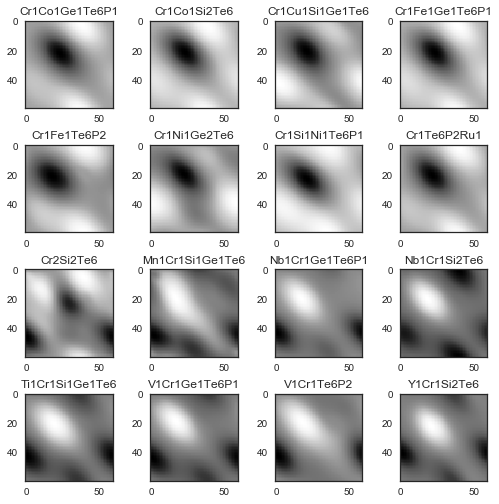

In [6]:
#Creates list of charge_data nad chgcar files

#dst_ext = '/Users/trevorrhone/Documents/Kaxiras/2DML/Spin_density/chg_matrices'
dst_ext = os.getcwd()+'/'+'chg_matrices'
chg_files = os.listdir(dst_ext)
charge_data = []
plt.figure(figsize=(7,7))
counter = 0
slice = 20
for fth, chg_file in enumerate(chg_files):
    #if fth < 9:
    #print(chg_file)
    os.chdir(dst_ext)
    charge = pickle.load( open( chg_file, "rb" ) )
    #print(charge.shape)
    charge_data.append(charge)
    fth_charge = charge[0,:,:,slice]
    skip = fth % 4.0
    #print(skip, type(skip))

    if skip == 0:
        if counter < 16:
            counter = counter +1
            plt.subplot(4,4,counter)
            plt.imshow(fth_charge)
            title = chg_file[:-8]
            title = title[12:]
            plt.title(title)
# charge_data = np.asmatrix(charge_data)

plt.tight_layout(pad=0.58)

In [7]:
# MATCH chg_files to magnetic moment info.. match file name...
formula_chg = np.asarray([x[:-8] for x in chg_files])
formula_chg = np.asarray([x[12:] for x in formula_chg])
formula_chg[:5]

array(['Cr1Co1Ge1Te6P1', 'Cr1Co1Ge2Te6', 'Cr1Co1Si1Ge1Te6',
       'Cr1Co1Si1Te6P1', 'Cr1Co1Si2Te6'], dtype='<U15')

In [8]:
sorted_formula = []
sorted_charge_data = []
sortdex = []
for f in df_mag['formula']:
    #print(f)
    index = np.argwhere(f == np.asarray(formula_chg))
    if len(index) !=0: #account for those strucures not present in df_mag
        index = index[0][0]
        sortdex.append(index)
    #print(f, sortdex)
sortdex = np.asarray(sortdex)
print(sortdex)
sorted_charge_data = [charge_data[i] for i in sortdex]
sorted_formula = formula_chg[sortdex]

len(sorted_formula)

[35 37 41 16 28 46 48 55 19 21  3 38 45 54 29 26 47  2 24  4 30 27 14  9
 42 50 61 53 31 11 10  0 36 51 25  1 39  5 20 56  7  6 32 12 57 13 58 18
 49 52 23 59 22 34 17 40 60 33 44 15 43  8]


62

In [9]:
# (x1_train, y1_train), (x1_test, y1_test) = mnist.load_data()
# x1_train.shape
# print(y1_test.shape)
# print(y1_test[:15])

df_charge = pd.DataFrame()
df_charge['formula'] = sorted_formula
df_charge['sorted_charge_data'] = sorted_charge_data
sorted_mag = df_mag['mag_mom'].values[sortdex]
df_charge['mag_mom'] = sorted_mag
# df_charge.head()
df_charge[['formula','mag_mom']].head()
print(df_charge.shape)



(62, 3)


In [10]:
cd Desktop/AC299r

[WinError 3] The system cannot find the path specified: 'Desktop/AC299r'
C:\Users\Shaan Desai\Desktop\AC299r


In [11]:
cd

C:\Users\Shaan Desai


In [12]:
cd Desktop


C:\Users\Shaan Desai\Desktop


In [13]:
cd AC299R

C:\Users\Shaan Desai\Desktop\AC299R


In [14]:
#save dataframe
df_charge.to_pickle('chgdf_input')